In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = [[0,0,0],
     [0,0,1],
     [0,1,0],
     [0,1,1],
     [1,0,0],
     [1,0,1],
     [1,1,0],
     [1,1,1]]

Y = [0,1,1,1,1,1,1,0]

X = np.array(X)
Y = np.array(Y)

In [3]:
X.shape

(8, 3)

In [4]:
Y.shape

(8,)

In [5]:
print(Y)

[0 1 1 1 1 1 1 0]


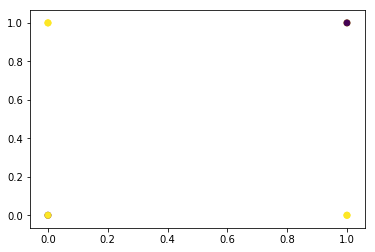

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def derivative_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [8]:
print(sigmoid(3))
print(derivative_sigmoid(3))

0.9525741268224334
0.045176659730912


In [9]:
def layer_size(X,Y):
    
    n_x = X.shape[1]
    n_h = 4
    n_y = 1
    
    return (n_x,n_h,n_y)

In [10]:
def initialize_parameters(n_x,n_h,n_y):
    
    W1 = np.random.randn(n_h,n_x) 
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [11]:
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    
    return cache

In [12]:
def compute_cost(A2,Y):
    m = Y.shape[0]
    
    logprobs = np.multiply(Y,np.log(A2)) + np.multiply((1-Y),np.log(1-A2))
    
    cost = (-1/m) * np.sum(logprobs)
    
    cost = np.squeeze(cost)
    
    return cost

In [13]:
def backpropagation(parameters,cache,X,Y):
    m = X.shape[0]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2) , derivative_sigmoid(Z1))
    dW1 = (1/m) * np.dot(dZ1,X)
    db1 = (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW2":dW2,
             "db2":db2,
             "dW1":dW1,
             "db1":db1}
    
    return grads

In [14]:
def update_parameters(parameters,grads,learning_rate=0.01):
     W1 = parameters["W1"]
     b1 = parameters["b1"]
     W2 = parameters["W2"]
     b2 = parameters["b2"]
    
     dW1 = grads["dW1"]
     db1 = grads["db1"]
     dW2 = grads["dW2"]
     db2 = grads["db2"]
    
     W1 = W1 - learning_rate * dW1
     b1 = b1 - learning_rate * db1
     W2 = W2 - learning_rate * dW2
     b2 = b2 - learning_rate * db2
    
     parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
     return parameters

In [15]:
def nn_model(X,Y,n_h=4,num_iterations=100000,learning_rate=0.01,print_cost=True):
    
    n_x = layer_size(X,Y)[0]
    n_y = layer_size(X,Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iterations + 1):
        cache = forward_propagation(X,parameters)
        
        cost = compute_cost(cache["A2"] , Y)
        
        grads = backpropagation(parameters,cache,X,Y)
        
        parameters = update_parameters(parameters,grads,learning_rate)
            
        if print_cost and i%10000 == 0:
            print("cost after %i iterations %f" %(i,cost))
        
    return parameters

In [16]:
parameters = nn_model(X,Y)

cost after 0 iterations 1.013704
cost after 10000 iterations 0.533806
cost after 20000 iterations 0.442082
cost after 30000 iterations 0.307877
cost after 40000 iterations 0.197006
cost after 50000 iterations 0.121077
cost after 60000 iterations 0.077174
cost after 70000 iterations 0.052957
cost after 80000 iterations 0.039227
cost after 90000 iterations 0.030817
cost after 100000 iterations 0.025254


In [17]:
print(parameters)

{'W1': array([[ 2.61049655, -6.8434689 ,  2.81413376],
       [ 5.2513263 ,  5.37242233,  5.18059983],
       [ 3.88575848, -1.1860015 ,  3.56018373],
       [ 1.21999786, -0.51228868, -2.09252676]]), 'b1': array([[-2.39106599],
       [-2.82728733],
       [-4.18960392],
       [-0.59373022]]), 'W2': array([[ 7.41866396,  9.44675051, -8.70773554,  1.45086828]]), 'b2': array([[-4.71581315]])}


In [18]:
def predict(X,parameters):
    cache = forward_propagation(X,parameters)
    
    y_pred = cache["A2"]
    y_pred = np.round(y_pred)
    
    return y_pred

In [19]:
print(predict(np.array([[1,1,1]]),parameters))

[[0.]]
